# Análise de Emissões de CO2 por Países

## Abstract
Este projeto visa analisar as emissões de CO2 de diferentes países, com foco no Brasil, comparando-o com dados globais, do continente americano, da OCDE e dos EUA. Utilizamos datasets sobre emissões de CO2 e PIB para gerar comparações e construir modelos preditivos com Machine Learning. Nosso objetivo é identificar padrões e relações entre emissões de CO2 e indicadores econômicos.

## Alunos
- Ricardo Queiroz RM94241
- Jhonatan Curci RM94188

## Questões de Pesquisa
1. Como as emissões de CO2 no Brasil variaram ao longo dos anos?
2. Quais são os paises que mais emitem CO2?
3. Existe uma relação entre o setor de energia e as emissões de CO2 por país?
4. Como a intensidade energética se relaciona com as emissões de CO2 nos diferentes países?
5. Como o PIB per capita de cada país se correlaciona com suas emissões de CO2 por país?
6. Qual pais emite mais CO2 entre o Brasil e o Eua?
7. Como a distribuição das emissões de CO2 no Brasil se alinha com os dados globais?
8. Qual o efeito do ao combustíveis limpos sobre as emissões de CO2 em diferentes países?
9. Como o crescimento do PIB de um país está relacionado com a evolução de suas emissões de CO2 por pessoa ao longo do tempo?
10. Como as emissões de CO2 por país têm evoluído ao longo dos anos, e existe uma tendência crescente ou decrescente nas emissões com base na linha de regressão?


## Obter Dados
Para este projeto, utilizamos dois datasets principais:
1. **Emissões de CO2**: Dados sobre emissões de CO2 por país ao longo dos anos.
2. **Global Data On Sustainable Energy**: Dados sustentabilidade e energia

Os dados foram obtidos do  Global CO2 Emissions Dataset e do Global Data on Sustainable Energy (2000-2020) do Kaggle

In [38]:
import pandas as pd

co2_df = pd.read_csv('data/CO2Emissions.csv')
gdos_df = pd.read_csv('data/global-data-on-sustainable-energy.csv')

co2_df.head()

,country,date,sector,value,timestamp
0,Brazil,01/01/2019,Power,0.096799,1546300800
1,China,01/01/2019,Power,14.816100,1546300800
2,EU27 & UK,01/01/2019,Power,1.886490,1546300800
3,France,01/01/2019,Power,0.051217,1546300800
4,Germany,01/01/2019,Power,0.315002,1546300800


## Limpeza de Dados
Os dados possuem alguns valores nulos e duplicados. Vamos proceder com a limpeza para garantir que nossos modelos sejam treinados com dados corretos.

- Remoção de valores nulos
- Remoção de duplicados
- Correção de tipos de dados


In [39]:
# Limpeza dos dados
co2_df.dropna(inplace=True)

# Remover duplicados
co2_df = co2_df.drop_duplicates()

# Verificando a limpeza
co2_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135408 entries, 0 to 135407
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   country    135408 non-null  object 
 1   date       135408 non-null  object 
 2   sector     135408 non-null  object 
 3   value      135408 non-null  float64
 4   timestamp  135408 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 5.2+ MB


# Merge entre os items

In [40]:

co2_df['date'] = pd.to_datetime(co2_df['date'], format='%d/%m/%Y')
co2_df['year'] = co2_df['date'].dt.year

gdos_df['Year'] = gdos_df['Year'].astype(int)

co2_df.rename(columns={'country': 'Country', 'year': 'Year'}, inplace=True)
gdos_df.rename(columns={'Entity': 'Country'}, inplace=True)


country_mapping = {
    'EU27 & UK': 'European Union',
    'US': 'United States',
    'UK': 'United Kingdom',
    'ROW': 'Rest of the World',
    'WORLD': 'World'
}


co2_df['Country'] = co2_df['Country'].replace(country_mapping)


merged_df = pd.merge(
    co2_df, 
    gdos_df,
    on=['Country', 'Year'], 
    how='inner' 
)



merged_df.to_csv('data/merged_CO2_Sustainability.csv', index=False)



merged_df



,Country,date,sector,value,timestamp,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Brazil,2019-01-01,Power,0.096799,1546300800,2019,99.800000,95.8,684.92,50980000.0,...,16681.945,3.93,4.343000e+05,47.304844,1.411153,8897.552966,25,8515770.0,-14.235004,-51.925280
1,China,2019-01-01,Power,14.816100,1546300800,2019,100.000000,77.6,529.28,201540000.0,...,28277.445,6.31,1.070722e+07,13.515960,5.949714,10143.838170,153,9596960.0,35.861660,104.195397
2,France,2019-01-01,Power,0.051217,1546300800,2019,100.000000,100.0,NaN,NaN,...,42326.785,3.29,3.005200e+05,12.384905,1.842972,40578.644290,119,643801.0,46.227638,2.213749
3,Germany,2019-01-01,Power,0.315002,1546300800,2019,100.000000,100.0,NaN,NaN,...,44467.746,2.76,6.574000e+05,18.768305,1.055508,46794.899290,240,357022.0,51.165691,10.451526
4,India,2019-01-01,Power,3.349220,1546300800,2019,97.308266,63.9,93.89,786330000.0,...,6731.805,4.28,2.456300e+06,8.849619,4.041554,2100.751461,464,3287263.0,20.593684,78.962880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43855,Italy,2020-12-31,International Aviation,0.005971,1609372800,2020,100.000000,100.0,NaN,NaN,...,27763.800,NaN,NaN,19.721262,-8.938593,31714.220950,206,301340.0,41.871940,12.567380
43856,Japan,2020-12-31,International Aviation,0.017817,1609372800,2020,100.000000,100.0,NaN,NaN,...,38029.270,NaN,NaN,11.155339,-4.585508,40193.252440,347,377944.0,36.204824,138.252924
43857,Spain,2020-12-31,International Aviation,0.012564,1609372800,2020,100.000000,100.0,NaN,NaN,...,30391.290,NaN,NaN,22.102654,-10.822886,27063.193920,94,505370.0,40.463667,-3.749220
43858,United Kingdom,2020-12-31,International Aviation,0.020729,1609372800,2020,100.000000,100.0,NaN,NaN,...,29425.540,NaN,NaN,20.078987,-9.396160,41059.168810,281,243610.0,55.378051,-3.435973


## Exploração dos Dados
Vamos explorar a relação entre PIB, população e emissões de CO2. Vamos visualizar essas variáveis usando gráficos.
# 1. Como as emissões de CO2 no Brasil variaram ao longo dos anos?

Este código tem como objetivo analisar as emissões de CO2 no Brasil ao longo dos anos, utilizando um dataset que contém informações sobre as emissões de CO2 por país. Primeiro, os dados são carregados e filtrados para o Brasil. Em seguida, a coluna de datas é convertida para o formato datetime, e o ano é extraído dessa data para agrupamento. As emissões de CO2 são somadas por ano, e um gráfico é gerado para mostrar a evolução das emissões no Brasil ao longo do tempo. O gráfico resultante ilustra a relação entre os anos e as emissões totais de CO2 no país.

/var/folders/gx/nbzhk3x51cdd2zvs7zmj0q780000gn/T/ipykernel_26097/2542971136.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brasil_data['date'] = pd.to_datetime(brasil_data['date'], format='%d/%m/%Y', errors='coerce')


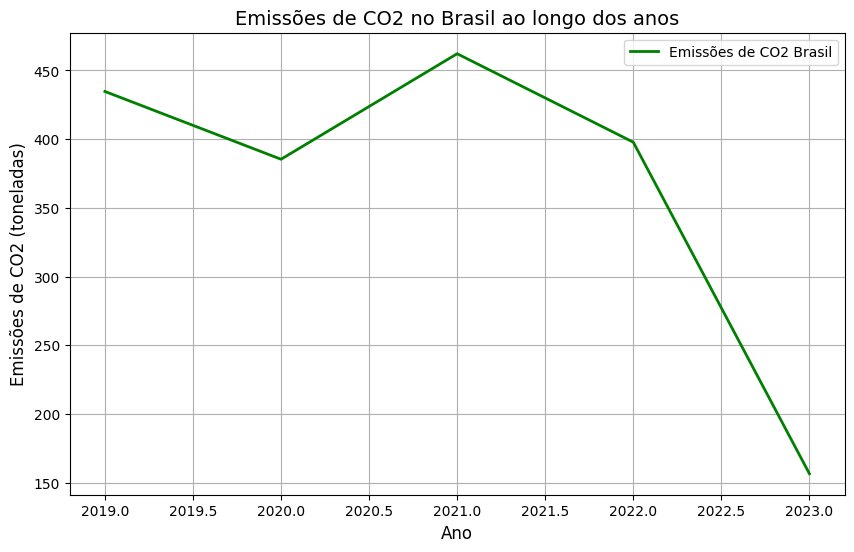

In [41]:
import pandas as pd
import matplotlib.pyplot as plt


co2_df = pd.read_csv('data/CO2Emissions.csv')


brasil_data = co2_df[co2_df['country'] == 'Brazil']


brasil_data['date'] = pd.to_datetime(brasil_data['date'], format='%d/%m/%Y', errors='coerce')


brasil_data = brasil_data.dropna(subset=['date'])


brasil_data['year'] = brasil_data['date'].dt.year


emissoes_ano = brasil_data.groupby('year')['value'].sum().reset_index()


plt.figure(figsize=(10, 6))
plt.plot(emissoes_ano['year'], emissoes_ano['value'], label='Emissões de CO2 Brasil', color='green', linewidth=2)
plt.title('Emissões de CO2 no Brasil ao longo dos anos', fontsize=14)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Emissões de CO2 (toneladas)', fontsize=12)
plt.legend()
plt.grid(True)  
plt.show()


Após a análise, observamos que as emissões de CO2 no Brasil aumentaram entre 2019 e 2021, mas apresentaram uma queda a partir de 2021 até 2023.

## 2. Quais são os paises que mais emitem CO2?

Este código agrupa as emissões de CO2 por país, soma os valores totais para cada um e ordena os países em ordem decrescente das maiores emissões. Em seguida, seleciona os 3 países com as maiores emissões e exibe um gráfico de barras utilizando a biblioteca Seaborn, mostrando as emissões totais de CO2 de cada país. O gráfico é estilizado com a paleta de cores 'viridis', incluindo títulos e rótulos adequados.


/var/folders/gx/nbzhk3x51cdd2zvs7zmj0q780000gn/T/ipykernel_26097/2687215196.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_co2_emissions.values, y=top_co2_emissions.index, palette='viridis')


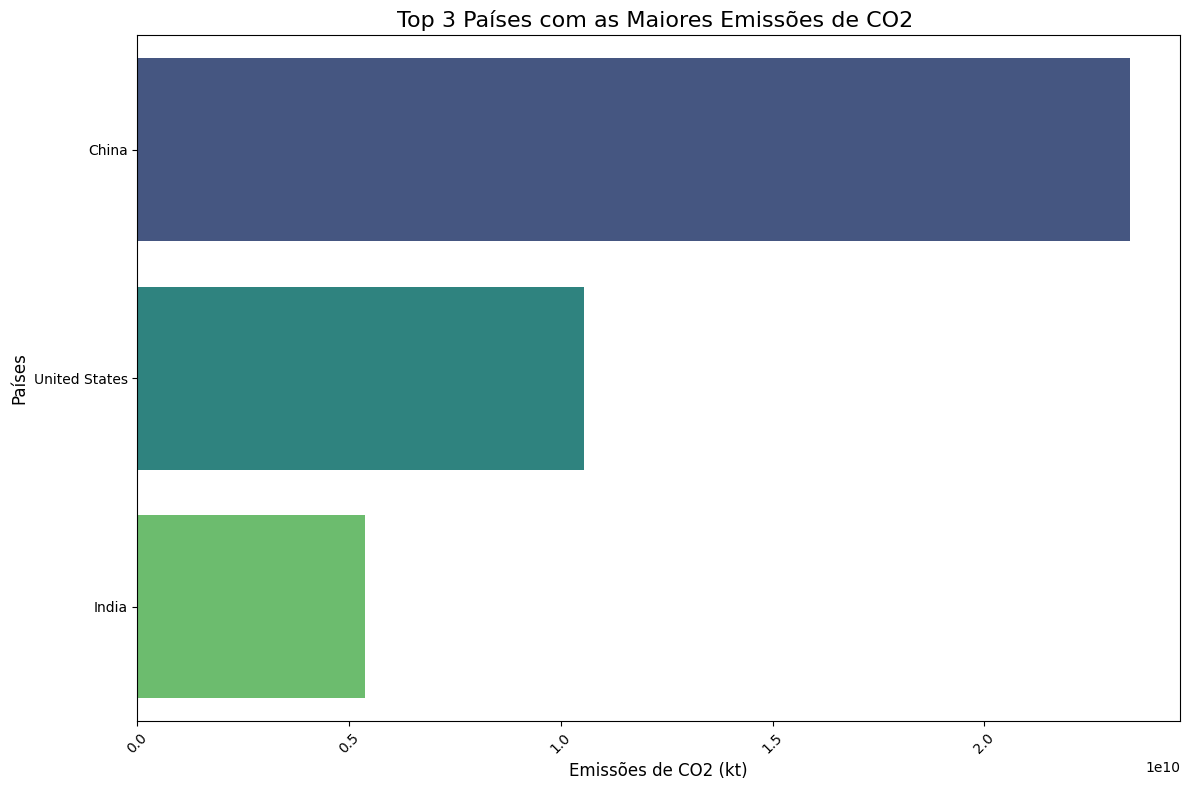

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns


top_co2_emissions = merged_df.groupby('Country')['Value_co2_emissions_kt_by_country'].sum().sort_values(ascending=False).head(3)


plt.figure(figsize=(12, 8))
sns.barplot(x=top_co2_emissions.values, y=top_co2_emissions.index, palette='viridis')
plt.title('Top 3 Países com as Maiores Emissões de CO2 ', fontsize=16)
plt.xlabel('Emissões de CO2 (kt)', fontsize=12)
plt.ylabel('Países', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Podemos observar que a China é o país com as maiores emissões de CO2 no mundo, seguida de perto pelos Estados Unidos e pela Índia.

## 3.Existe uma relação entre o setor de energia e as emissões de CO2 por país?

Neste código, será realizado um gráfico de dispersão (scatter plot) para analisar a relação entre o uso de energia renovável e as emissões de CO2 por país no setor de energia. O DataFrame `merged_df` será filtrado para incluir apenas os dados relacionados ao setor de energia, identificado pela coluna `sector` como 'Power'. O eixo X representará a porcentagem de energia renovável (renováveis equivalentes à energia primária), enquanto o eixo Y mostrará as emissões de CO2 (em kt) de cada país. A cor de cada ponto será determinada pelo país, usando a paleta "viridis", com uma legenda indicando os países.


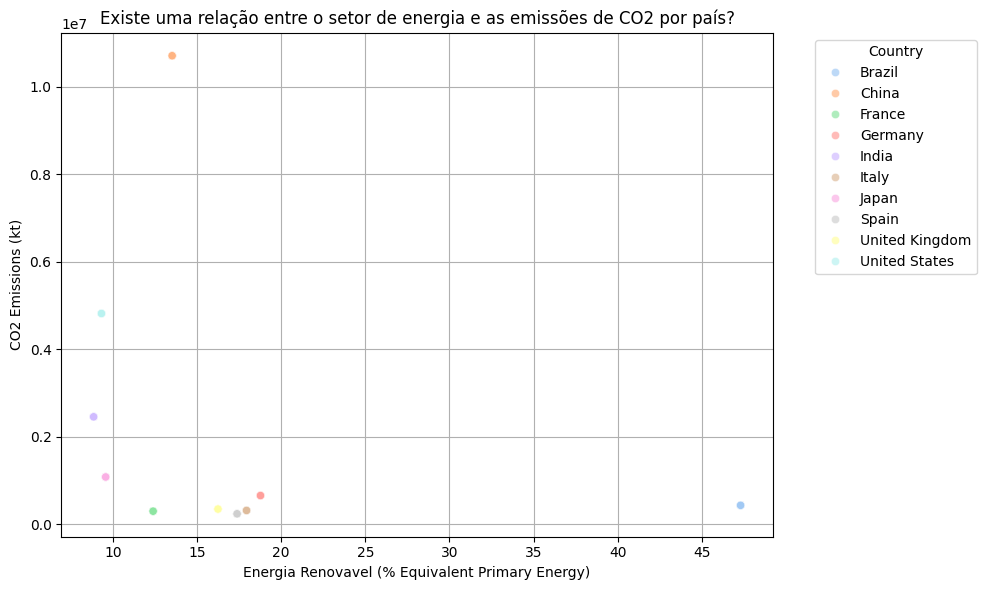

In [43]:
energy_data = merged_df[merged_df['sector'] == 'Power']

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=energy_data['Renewables (% equivalent primary energy)'],
    y=energy_data['Value_co2_emissions_kt_by_country'],
    hue=energy_data['Country'],
    palette="pastel",  
    alpha=0.7
)
plt.title('Existe uma relação entre o setor de energia e as emissões de CO2 por país?')
plt.xlabel('Energia Renovavel (% Equivalent Primary Energy)')
plt.ylabel('CO2 Emissions (kt)')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


A China é o país que mais emite CO2, apesar de ter um baixo índice de energia renovável em sua matriz energética. Os Estados Unidos ocupam a segunda posição em emissões, enquanto o Brasil se destaca por apresentar baixas emissões de CO2 e uma maior participação de energia renovável em sua matriz energética.

## 4. Como a intensidade energética se relaciona com as emissões de CO2 nos diferentes países?

Neste código, será analisada a relação entre a capacidade de eletricidade renovável per capita e as emissões de CO2 por país. O gráfico de dispersão gerado exibirá a capacidade de eletricidade renovável por capita no eixo X e as emissões de CO2 no eixo Y, com cada ponto representando um paí


   Country  Energy intensity level of primary energy (MJ/$2017 PPP GDP)  \
0   Brazil                                               3.93             
1    China                                               6.31             
2   France                                               3.29             
3  Germany                                               2.76             
4    India                                               4.28             

   Value_co2_emissions_kt_by_country  
0                       4.343000e+05  
1                       1.070722e+07  
2                       3.005200e+05  
3                       6.574000e+05  
4                       2.456300e+06  


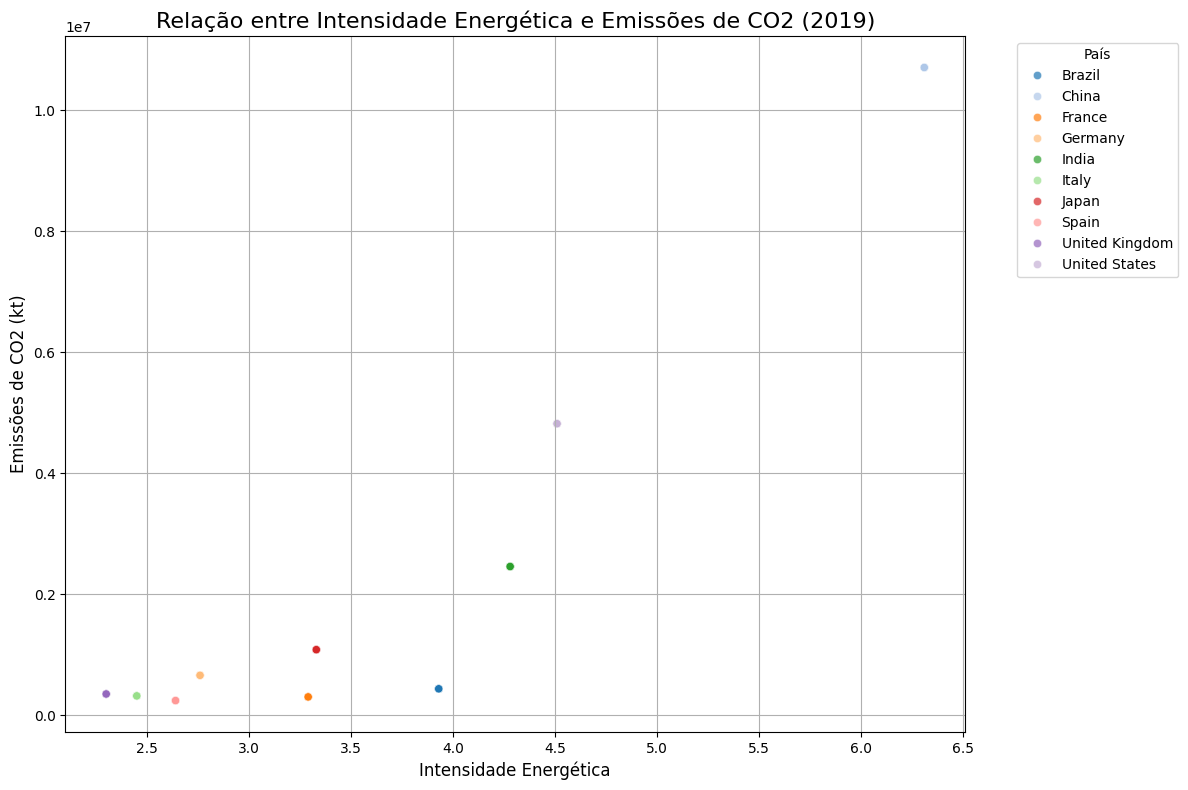

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


data_2019 = merged_df[merged_df['Year'] == 2019]

print(data_2019[['Country', 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)', 'Value_co2_emissions_kt_by_country']].head())


plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='Energy intensity level of primary energy (MJ/$2017 PPP GDP)', 
    y='Value_co2_emissions_kt_by_country', 
    data=data_2019,
    hue='Country',  
    palette="tab20",  
    alpha=0.7
)


plt.title('Relação entre Intensidade Energética e Emissões de CO2 (2019)', fontsize=16)
plt.xlabel('Intensidade Energética', fontsize=12)
plt.ylabel('Emissões de CO2 (kt)', fontsize=12)
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


A China lidera com alta intensidade energética e altas emissões de CO2. Os Estados Unidos vêm logo em seguida, também com altas emissões de CO2 e alta intensidade energética. A Índia está pouco atrás, apresentando uma situação semelhante. O Brasil esta com um nivel baixo de CO2 emitido em comparação a China e os Estados Unidos energética. Com base nesses dados, observa-se que existe uma relação entre a intensidade energética e as emissões de CO2.

## 5. Como o PIB per capita de cada país se correlaciona com suas emissões de CO2 por país?

Neste código, será analisada a relação entre o PIB per capita e as emissões de CO2 por país. Um gráfico de dispersão será gerado, com o PIB per capita no eixo X e as emissões de CO2 no eixo Y, onde cada ponto representará um país. A cor de cada ponto será atribuída com base no país. O objetivo é observar se existe uma correlação entre o desenvolvimento econômico (representado pelo PIB per capita) e as emissões de CO2, ou seja, verificar se países com maior PIB per capita tendem a emitir mais CO2.


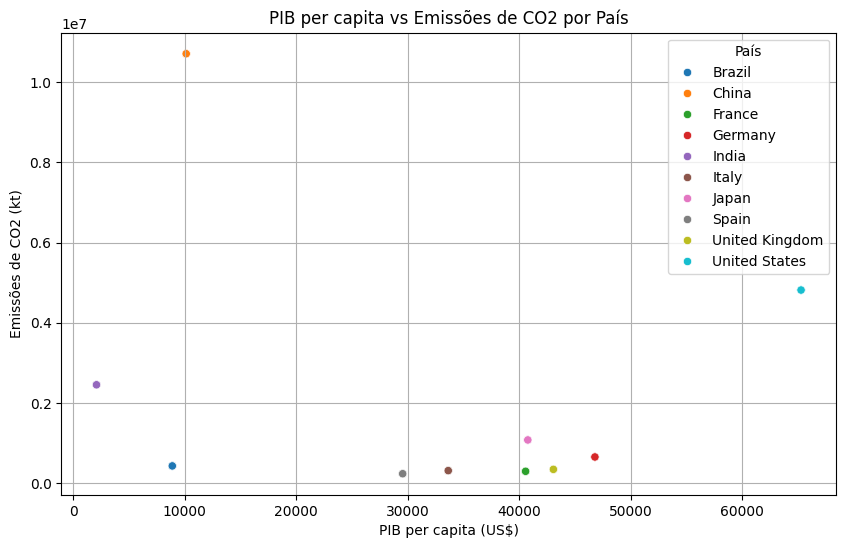

In [45]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='gdp_per_capita',
    y='Value_co2_emissions_kt_by_country',
    hue='Country',
    data=merged_df,
    palette='tab10'
)
plt.title('PIB per capita vs Emissões de CO2 por País')
plt.xlabel('PIB per capita (US$)')
plt.ylabel('Emissões de CO2 (kt)')
plt.legend(title='País')
plt.grid(True)
plt.show()


A China é o país que mais emite CO2, apesar de ter um PIB per capita relativamente baixo. Já os Estados Unidos, com o maior PIB per capita, ocupam a segunda posição nas emissões de CO2. A Índia, por sua vez, apresenta um PIB per capita inferior ao da China e emite menos CO2, posicionando-se abaixo desses dois países em termos de emissões.

## 6. Qual pais emite mais CO2 entre o Brasil e o Eua?

O código filtra os dados para selecionar apenas os países Brasil e Estados Unidos e, em seguida, cria um gráfico de barras comparando as emissões de CO2 entre esses dois países. 

/var/folders/gx/nbzhk3x51cdd2zvs7zmj0q780000gn/T/ipykernel_26097/2024825516.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


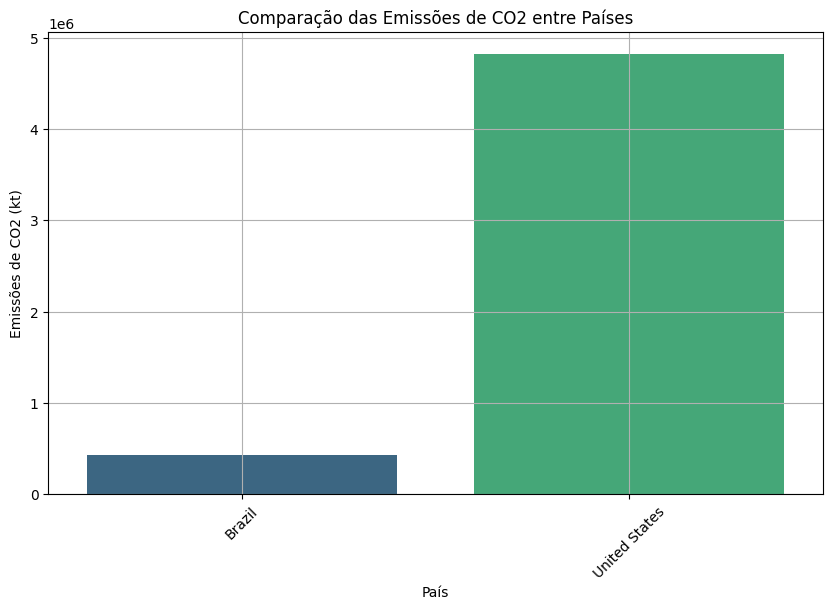

In [46]:

countries_of_interest = ['Brazil', 'United States']

selected_data = merged_df[merged_df['Country'].isin(countries_of_interest)]

plt.figure(figsize=(10, 6))
sns.barplot(
    x='Country',
    y='Value_co2_emissions_kt_by_country',
    data=selected_data,
    palette='viridis'
)
plt.title('Comparação das Emissões de CO2 entre Países')
plt.xlabel('País')
plt.ylabel('Emissões de CO2 (kt)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


As emissões de CO2 dos Estados Unidos são significativamente mais altas do que as do Brasil.

## 7. Como a distribuição das emissões de CO2 no Brasil se alinha com os dados globais?

Este código cria um DataFrame sobre as emissões de CO2 de Brasil e do mundo no setor de energia, calcula as emissões per capita dividindo as emissões pela população de cada país e cria um gráfico de barras para comparar as emissões de CO2 per capita entre o Brasil e o valor global.

  Country       date sector      value   timestamp  CO2_per_capita
0  Brazil 2019-01-01  Power   0.096799  1546300800    4.587630e-07
1   WORLD 2019-01-03  Power  39.786800  1546473600    5.100872e-06


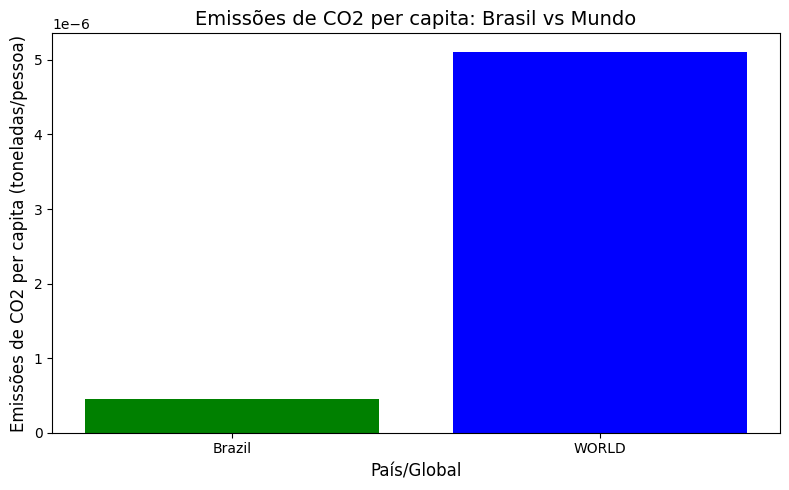

In [47]:
import pandas as pd
import matplotlib.pyplot as plt


data = {
    'Country': ['Brazil', 'WORLD'],
    'date': ['01/01/2019', '03/01/2019'],
    'sector': ['Power', 'Power'],
    'value': [0.096799, 39.7868],
    'timestamp': ['1546300800', '1546473600']
}


df = pd.DataFrame(data)


df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')



population_data = {
    'Brazil': 211000000,
    'WORLD': 7800000000
}


df['CO2_per_capita'] = df['value'] / df['Country'].map(population_data) * 1000  


print(df)



plt.figure(figsize=(8, 5))


plt.bar(df['Country'], df['CO2_per_capita'], color=['green', 'blue'])


plt.title('Emissões de CO2 per capita: Brasil vs Mundo', fontsize=14)
plt.ylabel('Emissões de CO2 per capita (toneladas/pessoa)', fontsize=12)
plt.xlabel('País/Global', fontsize=12)


plt.tight_layout()
plt.show()


A análise mostra que, em 2019, o Brasil teve emissões de CO2 no setor de energia de 0.096799 kt, resultando em uma emissão per capita de 4.59 × 10⁻⁷ toneladas por pessoa. Por outro lado, o valor global (WORLD) teve emissões de 39.7868 kt, com uma emissão per capita de 5.10 × 10⁻⁶ toneladas por pessoa. Isso indica que as emissões de CO2 per capita do valor global são significativamente mais altas do que as do Brasil.

## 8. Qual o efeito do ao combustíveis limpos sobre as emissões de CO2 em diferentes países?

/var/folders/gx/nbzhk3x51cdd2zvs7zmj0q780000gn/T/ipykernel_26097/1466222165.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_clean.loc[:, 'Normalized_CO2_Emissions'] = (


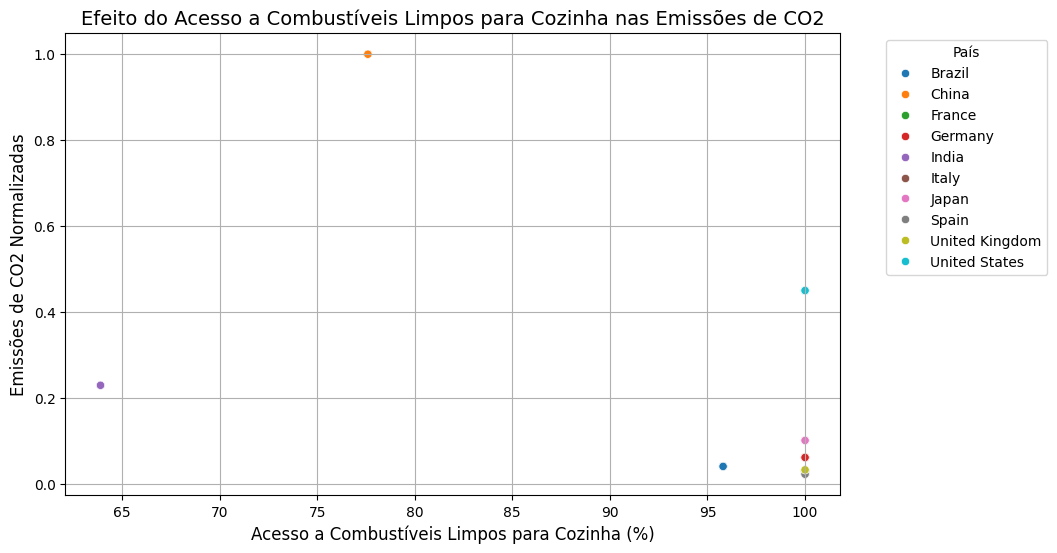

In [ ]:

subset = merged_df[['Country', 'Access to clean fuels for cooking', 'Value_co2_emissions_kt_by_country']]


subset_clean = subset.dropna()


subset_clean.loc[:, 'Normalized_CO2_Emissions'] = (
    subset_clean['Value_co2_emissions_kt_by_country'] / subset_clean['Value_co2_emissions_kt_by_country'].max()
)


plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=subset_clean,
    x='Access to clean fuels for cooking',
    y='Normalized_CO2_Emissions',
    hue='Country',
    legend=True
)

plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Efeito do Acesso a Combustíveis Limpos para Cozinha nas Emissões de CO2', fontsize=14)
plt.xlabel('Acesso a Combustíveis Limpos para Cozinha (%)', fontsize=12)
plt.ylabel('Emissões de CO2 Normalizadas', fontsize=12)
plt.grid(True)


plt.show()


A China é o maior emissor de CO2, mas possui um acesso limitado a combustíveis limpos para cozinha. Por outro lado, os Estados Unidos, Alemanha, Japão, Inglaterra e Espanha são os países com maior acesso a combustíveis limpos para cozinha. O Brasil está atrás desses países, enquanto a Índia é o país com o menor acesso a combustíveis limpos para cozinha, ficando ainda mais atrás do Brasil.

## 9. Como o crescimento do PIB de um país está relacionado com a evolução de suas emissões de CO2 por pessoa ao longo do tempo?

 Este código realiza uma regressão linear para explorar a relação entre o crescimento do PIB e as emissões de CO2. Ele seleciona e limpa os dados, normaliza as emissões de CO2, aplica o modelo de regressão linear e plota os resultados, exibindo a fórmula da linha de regressão no gráfico. O objetivo  entender como o crescimento econômico pode influenciar as emissões de CO2.

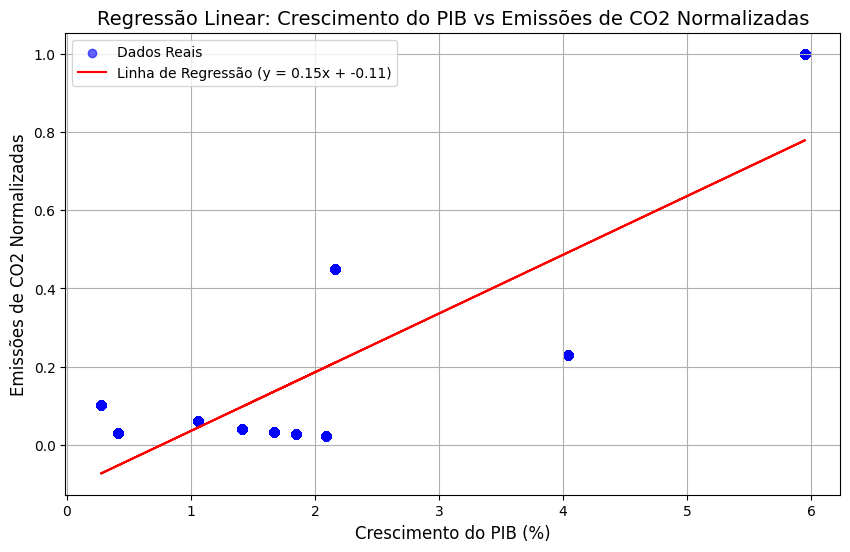

In [49]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt


subset_regression = merged_df[['gdp_growth', 'Value_co2_emissions_kt_by_country', 'Year']]
subset_regression_clean = subset_regression.dropna().copy()  


subset_regression_clean['Normalized_CO2'] = (
    subset_regression_clean['Value_co2_emissions_kt_by_country']
    / subset_regression_clean['Value_co2_emissions_kt_by_country'].max()
)


X = subset_regression_clean[['gdp_growth']].values  
y = subset_regression_clean['Normalized_CO2'].values  


modelo = LinearRegression()
modelo.fit(X, y)


coeficiente = modelo.coef_[0]
intercepto = modelo.intercept_


subset_regression_clean['Predicted_CO2'] = modelo.predict(X)


plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.6, label='Dados Reais', color='blue')
plt.plot(X, subset_regression_clean['Predicted_CO2'], color='red', label=f'Linha de Regressão (y = {coeficiente:.2f}x + {intercepto:.2f})')


plt.title('Regressão Linear: Crescimento do PIB vs Emissões de CO2 Normalizadas', fontsize=14)
plt.xlabel('Crescimento do PIB (%)', fontsize=12)
plt.ylabel('Emissões de CO2 Normalizadas', fontsize=12)
plt.legend()
plt.grid(True)

plt.show()


Com base no gráfico, há uma relação positiva entre o crescimento do PIB e as emissões de CO2 normalizadas, mas essa relação parece moderada, com considerável dispersão dos pontos. 

## 10. Como as emissões de CO2 por país têm evoluído ao longo dos anos, e existe uma tendência crescente ou decrescente nas emissões com base na linha de regressão?


O código treina um modelo de Árvore de Decisão para prever se as emissões de CO2 aumentaram ou diminuíram ao longo dos anos, avaliando o desempenho com um relatório de classificação e uma matriz de confusão.

Distribuição das classes no conjunto de treino: Counter({np.int64(1): 9198, np.int64(0): 6131})
Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2628
           1       1.00      1.00      1.00      3942

    accuracy                           1.00      6570
   macro avg       1.00      1.00      1.00      6570
weighted avg       1.00      1.00      1.00      6570



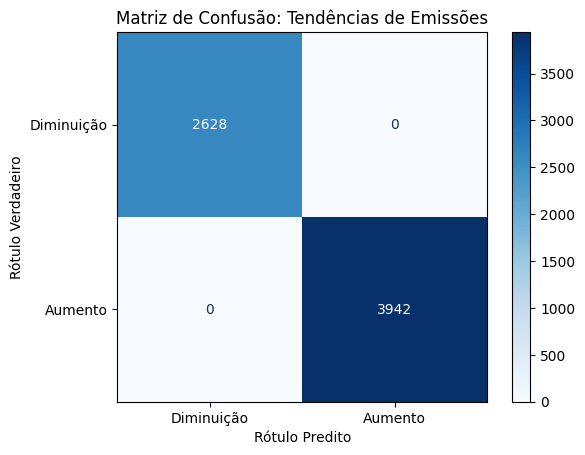

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np


subset_classification = merged_df[['Year', 'Value_co2_emissions_kt_by_country']].dropna().copy()
subset_classification['Tendencia_Emissao'] = subset_classification['Value_co2_emissions_kt_by_country'].diff()
subset_classification['Tendencia_Emissao'] = subset_classification['Tendencia_Emissao'].apply(lambda x: 1 if x > 0 else 0)


subset_classification['Emissao_Anterior'] = subset_classification['Value_co2_emissions_kt_by_country'].shift(1)
subset_classification = subset_classification.dropna() 

X = subset_classification[['Year', 'Emissao_Anterior']].values  
y = subset_classification['Tendencia_Emissao'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


from collections import Counter
print("Distribuição das classes no conjunto de treino:", Counter(y_train))


clf = DecisionTreeClassifier(random_state=42, class_weight='balanced')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)


print("Relatório de Classificação:")
print(classification_report(y_test, y_pred, zero_division=1))


disp = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=['Diminuição', 'Aumento'], cmap='Blues')


plt.title("Matriz de Confusão: Tendências de Emissões")
plt.xlabel("Rótulo Predito")  
plt.ylabel("Rótulo Verdadeiro") 
plt.show()


Esse gráfico revela que revela que o modelo obteve um desempenho perfeito nas previsões, com 100% de precisão. Ele conseguiu classificar corretamente todas as instâncias, sem erros de previsão. Para a classe “Diminuição”, o modelo previu corretamente 2.628 instâncias como “Diminuição” e não cometeu falsos negativos. Para a classe “Aumento”, ele previu corretamente 3.942 instâncias como “Aumento” e não houve falsos positivos. Assim tendo tendencia de aumento.

## Conclusão
Ao longo deste projeto, pudemos analisar as emissões de CO2 de diversos países e entender como elas estão interligadas com diversos fatores, como intensidade energética, PIB per capita e o uso de combustíveis limpos. A análise revelou que países como China e Estados Unidos, com intensidades energéticas mais altas, também apresentam emissões de CO2 mais elevadas, o que confirma a relação entre esses dois fatores.

O Brasil, por sua vez, apresenta uma matriz energética com maior participação de fontes renováveis, o que resulta em menores emissões de CO2. No entanto, ao compará-lo com países como os Estados Unidos, a diferença na emissão de CO2 é considerável. A análise também destacou o papel dos combustíveis limpos para cozinha, que é um fator relevante nas emissões, com países como Estados Unidos e Alemanha apresentando maior acesso a esses combustíveis e a China, por outro lado, com menos acesso a essa tecnologia.

Além disso, ao observarmos a evolução das emissões ao longo dos anos, fica claro que, embora haja uma tendência de aumento em alguns países, especialmente com o crescimento da demanda energética, o impacto das políticas energéticas e do PIB per capita nas emissões é notável. A partir do modelo de regressão, observamos que a tendência das emissões de CO2 no futuro, em vários países, está alinhada com esse crescimento, refletindo a necessidade de políticas públicas mais eficazes para reduzir o impacto ambiental.

Em suma, este projeto contribui para a compreensão das dinâmicas entre desenvolvimento econômico, uso de energia e emissões de CO2, oferecendo insights valiosos para políticas públicas e estratégias globais de sustentabilidade e mitigação de mudanças climáticas.

## Referencias
Kaggle
Bases de dados relacionadas a emissões globais e setores econômicos utilizados para análise.
Link: https://www.kaggle.com

dataset - Global Data on Sustainable Energy (2000-2020) https://www.kaggle.com/code/aliuoa/global-data-on-sustainable-energy-2000-2020

Scikit-learn Library
Ferramenta para regressão linear utilizada na análise das relações entre crescimento do PIB e emissões de CO2.
Documentação: https://scikit-learn.org

Matplotlib
Para a criação de gráficos e visualizações dos dados de emissões e crescimento econômico.
Documentação: https://matplotlib.org

Seaborn
Utilizada para as visualizações estatísticas, como gráficos de dispersão e correlações.
Documentação: https://seaborn.pydata.org

